In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/ssd_scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

/ssd_scratch/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cases = dict()

# cases["1e-3"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1b-p1e-3")
# cases["1e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1c-p1e-4")
# cases["1e0"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1d-p1e0")
# cases["1e6"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1e-p1e6")
# cases["1x"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1x")
# cases["step-1a"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/step-1a")
# cases["92"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/step-1b-0.92")
# cases["p1e-2_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1a-from_1d_recycling")
# cases["p1e-2_i5e-5"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1c-p1e-2_i5e-5")
# cases["p1e-2_i1e-5"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1b-p1e-2_i1e-5")
# cases["p1e-1_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1d-p1e-1_i5e-4")
# cases["p1e0_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1e-p1e0_i5e-4")
# cases["p1e1_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1f-p1e1_i5e-4")
# cases["p1e2_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1g-p1e2_i5e-4")
# cases["p1e3_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1h-p1e3_i5e-4")
# cases["p1e2_i5e-5"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1i-p1e2_i5e-5")
# cases["p5e2_i5e-4"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1j-p5e2_i5e-4")
# cases["p5e2_i5e-4_cfthr"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1j-p5e2_i5e-4_cfthr")
# cases["p5e2_i5e-4_tol0.005"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/2b-p5e2_i5e-4_tol0.005_cfthr")
# cases["pioff"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/2c-2a_pioff_100frec")
# cases["pioff_0.1fac"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/2d-p5e2_i5e-4_tol0.005_0.1factor")
# cases["1y"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/1y")

# cases["3a-pioff_100frec"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/3a-pioff_100frec")
# cases["3b-3a_pion"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/3b-3a_pion")
# cases["3c-3a_pion_no_finetune"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/3c-3a_pion_no_finetune")
cases["3d-3c_pioff_cfthr"] = Load.case_1D(r"/ssd_scratch/cases/hermes-pifixes/3d-3c_pioff_cfthr")

/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/array/core.py:4656: PerformanceWarning: Increasing number of chunks by factor of 10
  result = blockwise(


## Signal breakdown

In [3]:
%matplotlib widget

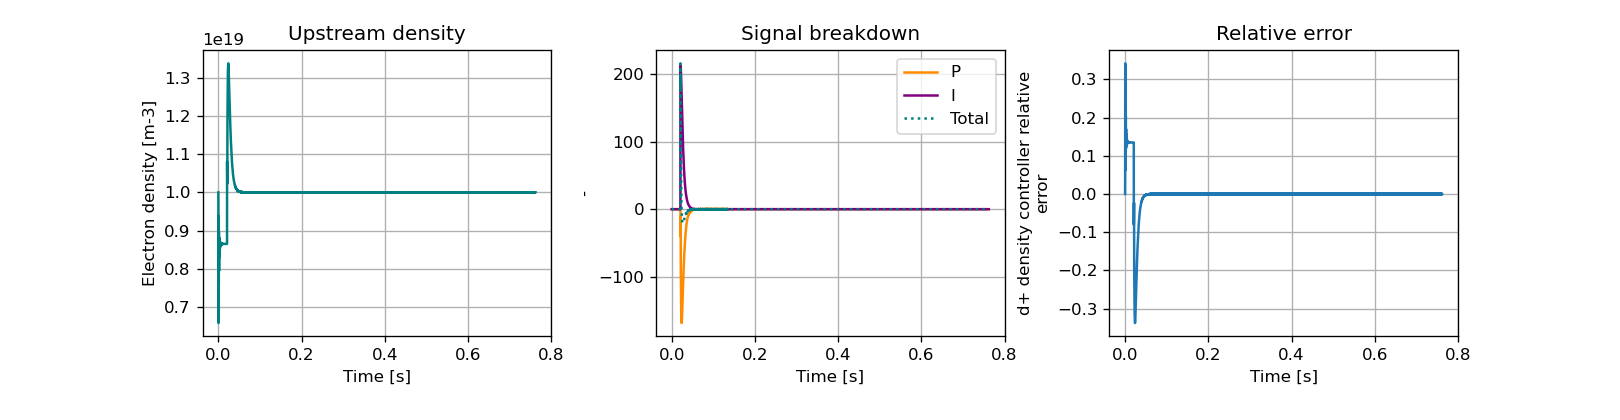

In [4]:
for name in cases.keys():
    plot_density_feedback_controller(cases[name].ds)

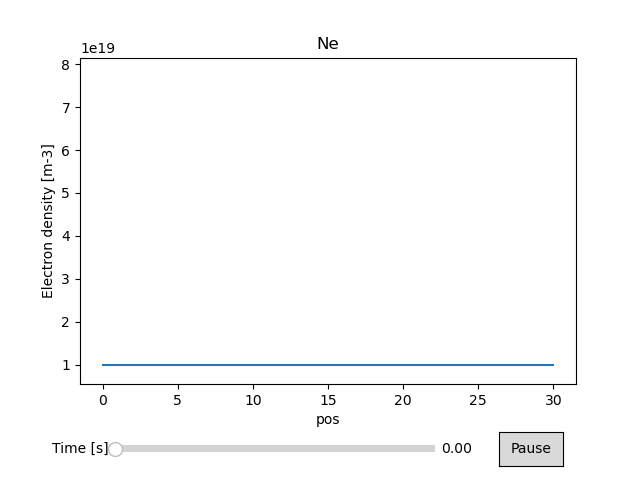

In [5]:
xbout.plotting.animate.animate_line(cases["3b-3a_pion"].ds["Ne"].isel(pos=slice(1,-1)))

In [4]:
%matplotlib widget

## PI controller signal and particle balance

In [15]:
cases["pioff_0.1fac"].ds.dims

Frozen({'pos': 104, 't': 801, 'y': 104})

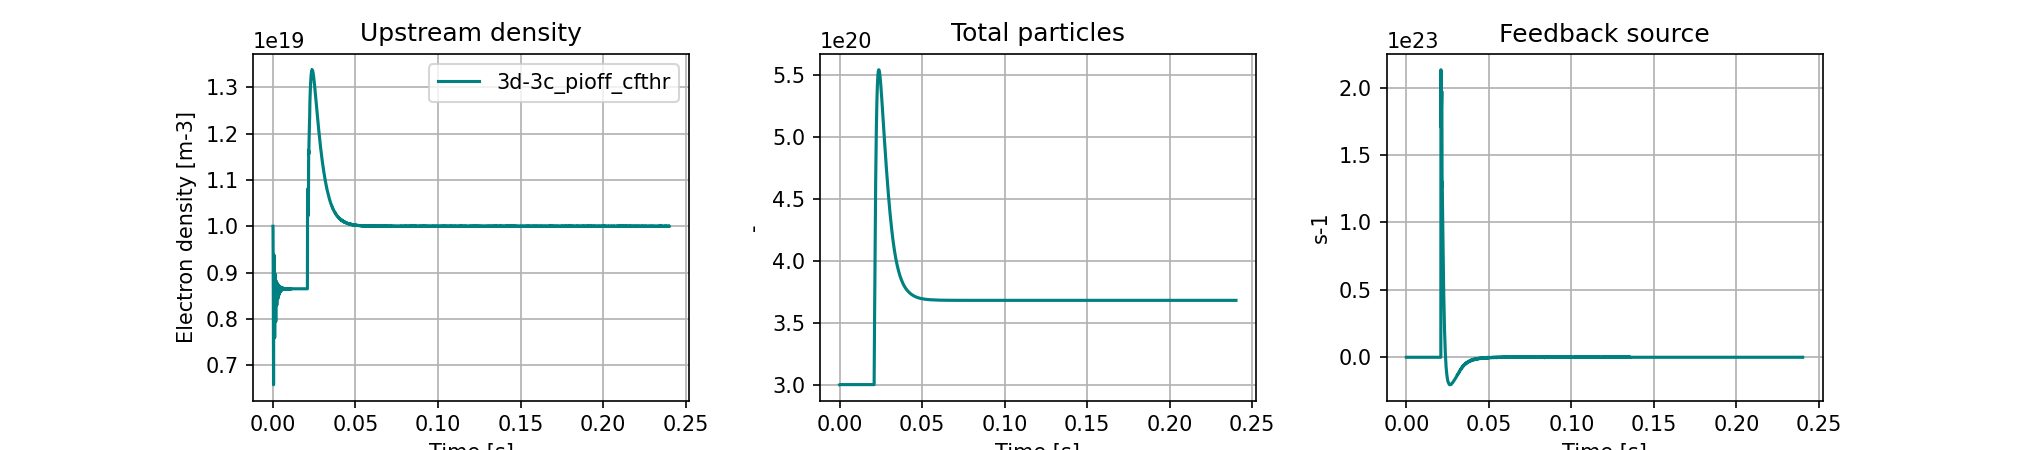

In [5]:


fig, axes = plt.subplots(1,3, figsize=(4.5*3, 3), dpi = 150)
fig.subplots_adjust(wspace=0.3)
colors = ["teal", "darkorange", "firebrick", "deeppink", "green", "navy"]
for i, case in enumerate(cases.keys()):
    
    ds = cases[case].ds.isel(pos=slice(2,-1))
    particle_count = ((ds["Ne"] + ds["Nd"])*ds["dv"]).sum("pos")
    ds["Ne"].isel(pos=0).plot(ax = axes[0], c = colors[i], label = case)
    (particle_count).plot(ax = axes[1], c = colors[i])
    # ds["densi"]
    (ds["Sd+_feedback"] * ds["dv"]).sum("pos").plot(ax = axes[2], c = colors[i])

# pflux.plot(ax=axes[2])
axes[0].legend()
axes[0].set_title("Upstream density")
axes[1].set_title("Total particles")
axes[2].set_title("Feedback source")
axes[2].set_ylabel("s-1")
axes[1].set_ylabel("-")


for ax in axes:
    ax.grid()


In [1]:
import netCDF4 as nc
d = nc.Dataset(r"/ssd_scratch/cases/hermes-pifixes/1j-p5e2_i5e-4_cfthr/BOUT.dmp.0.nc")
[print(x) for x in d.variables.keys() if "feedback" in x]

Sd+_feedback
density_feedback_src_i_d+
density_feedback_src_mult_d+
density_feedback_src_p_d+
density_feedback_src_shape_d+


[None, None, None, None, None]

In [3]:
d["density_feedback_src_p_d+"]

<class 'netCDF4._netCDF4.Variable'>
float64 density_feedback_src_p_d+(t)
    current_time_index: 11
    long_name: d+ proportional feedback term
    source: upstream_density_feedback
    time_dimension: t
unlimited dimensions: t
current shape = (11,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [4]:
d["density_feedback_src_p_d+"]

<class 'netCDF4._netCDF4.Variable'>
float64 density_feedback_src_p_d+()
    long_name: d+ proportional feedback term
    source: upstream_density_feedback
    units: unitless
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [2]:
casepath = r"/ssd_scratch/cases/hermes-pifixes/1j-p5e2_i5e-4"
datapath = os.path.join(casepath, "BOUT.dmp.*.nc")
inputfilepath = os.path.join(casepath, "BOUT.inp")

ds = xbout.load.open_boutdataset(
                datapath = datapath, 
                inputfilepath = inputfilepath, 
                info = False,
                keep_yboundaries=True,
                cache = False
                )

[print(x) for x in ds.data_vars.keys() if "feedback" in x]

Sd+_feedback
density_feedback_src_mult_d+
density_feedback_src_shape_d+


[None, None, None]

In [3]:
ds.data_vars

Data variables:
    Bxy                            (x, y) float64 dask.array<chunksize=(1, 12), meta=np.ndarray>
    G1                             (x, y) float64 dask.array<chunksize=(1, 12), meta=np.ndarray>
    G2                             (x, y) float64 dask.array<chunksize=(1, 12), meta=np.ndarray>
    G3                             (x, y) float64 dask.array<chunksize=(1, 12), meta=np.ndarray>
    J                              (x, y) float64 dask.array<chunksize=(1, 12), meta=np.ndarray>
    NVd                            (t, x, y, z) float64 dask.array<chunksize=(401, 1, 12, 1), meta=np.ndarray>
    NVd+                           (t, x, y, z) float64 dask.array<chunksize=(401, 1, 12, 1), meta=np.ndarray>
    Nd                             (t, x, y, z) float64 dask.array<chunksize=(401, 1, 12, 1), meta=np.ndarray>
    Nd+                            (t, x, y, z) float64 dask.array<chunksize=(401, 1, 12, 1), meta=np.ndarray>
    Ne                             (t, x, y, z) float64

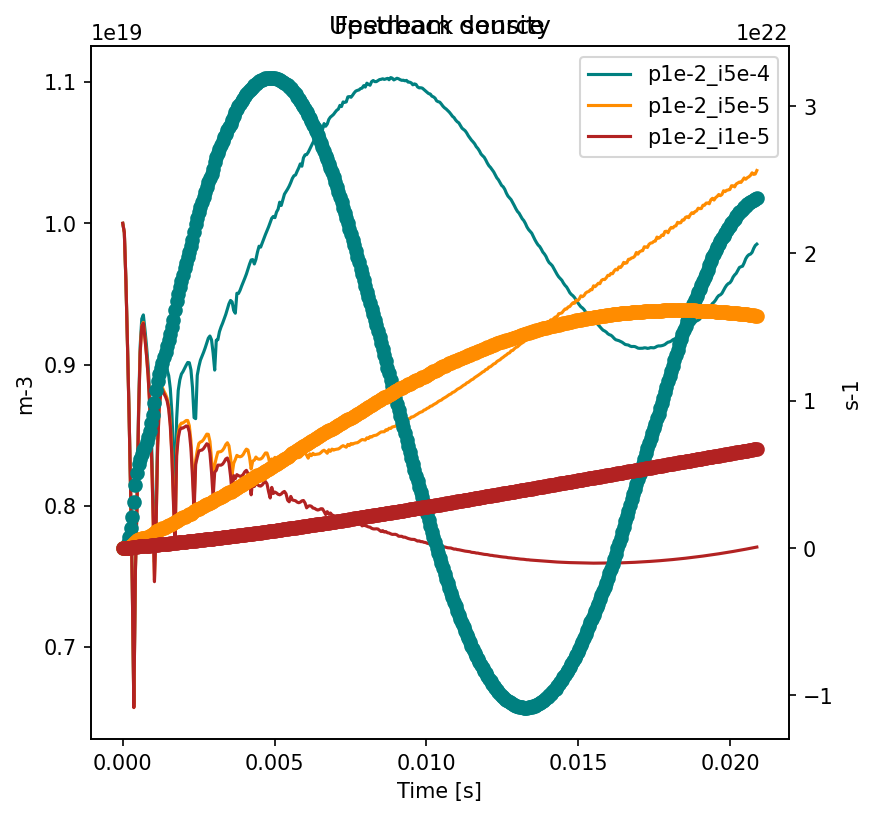

In [23]:


fig, ax = plt.subplots(figsize=(6,6), dpi = 150)
ax2 = ax.twinx()

fig.subplots_adjust(wspace=0.3)
colors = ["teal", "darkorange", "firebrick"]
for i, case in enumerate(cases.keys()):
    
    ds = cases[case].ds.isel(pos=slice(2,-1))

    ds["Ne"].isel(pos=0).plot(ax = ax, c = colors[i], label = case)
    (ds["Sd+_feedback"] * ds["dv"]).sum("pos").plot(ax = ax2, c = colors[i], lw = 0, marker = "o")

# pflux.plot(ax=axes[2])
ax.legend()
ax.set_title("Upstream density")

ax2.set_title("Feedback source")
ax.set_ylabel("m-3")
ax2.set_ylabel("s-1")


for ax in axes:
    ax.grid()


In [4]:
%matplotlib widget

/ssd_scratch/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  func(*args, **kwargs)


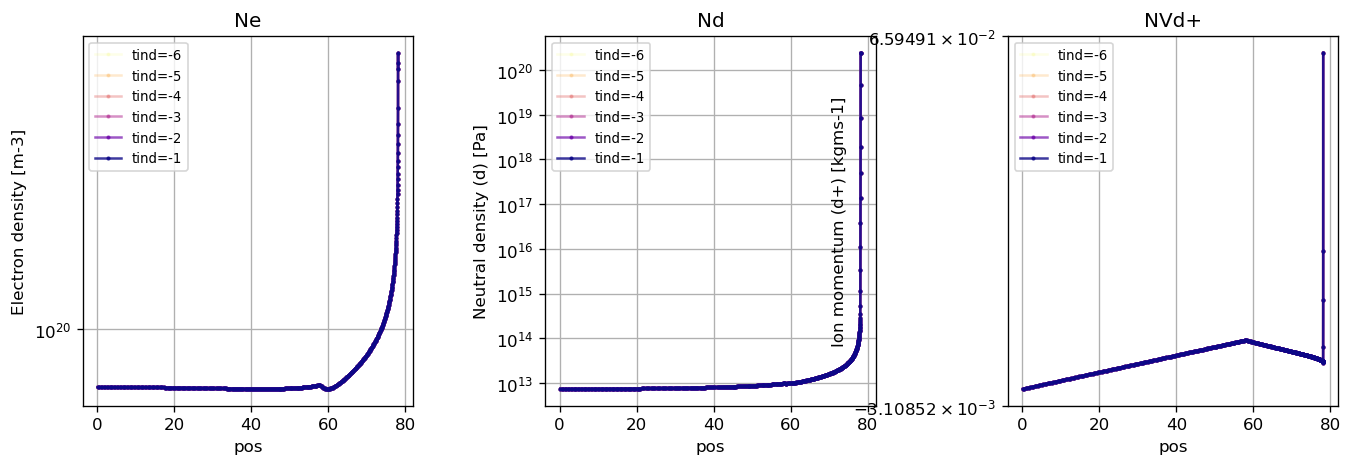

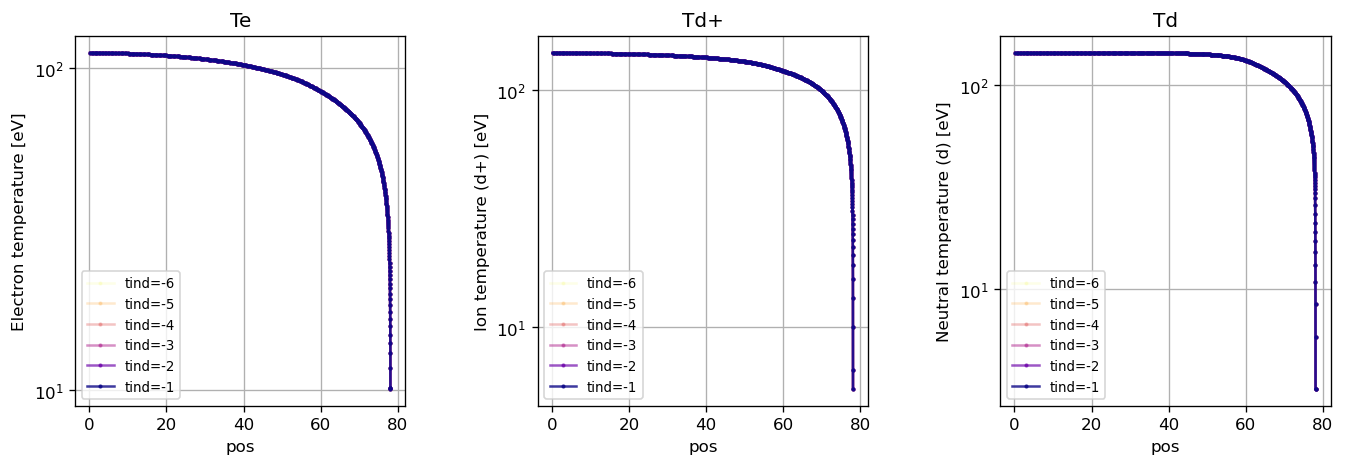

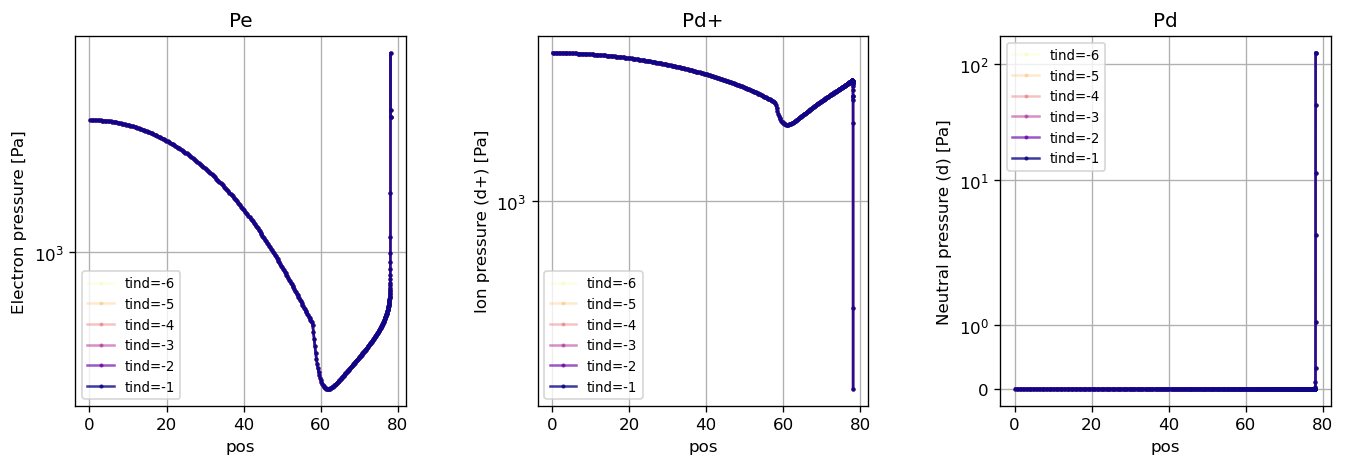

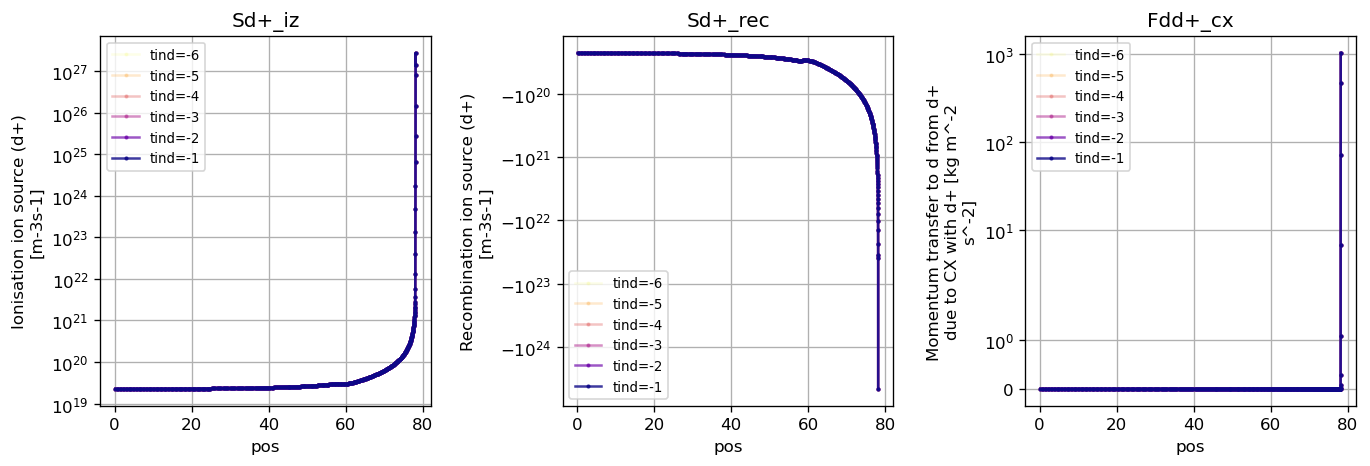

In [4]:
plt.close("all")
ds = cases["92"].ds.isel(pos=slice(2,-1))


def plot(list_params):
    fig, axes = plt.subplots(1, len(list_params), figsize=(len(list_params)*4.5, 4), dpi = 120)
    fig.subplots_adjust(wspace = 0.4)
    times = [-6, -5, -4, -3, -2, -1]
    
    # times = np.linspace(5, len(ds.coords["t"])-1, 10, dtype=int)
    alphas = np.linspace(0.1,0.8, len(times))
    colors = make_cmap("plasma", len(times))[::-1]
    for j, param in enumerate(list_params):
        for i, tind in enumerate(times):
            data = ds[param].isel(t=tind)
            # data = data.sel(pos=slice(77.5,None))
            data.plot(ax = axes[j], x = "pos", marker = "o", label = f"tind={tind}", color = colors[i], ms = 1.5, lw = 1.5, alpha = alphas[i])
            
        axes[j].grid()
        axes[j].set_title(param)
        axes[j].legend(fontsize=8)
        axes[j].set_yscale("symlog")
        
# plot(["Rar", "Sd+_iz", "Ne", "Td+"])
plot(["Ne", "Nd", "NVd+"])
# plot(["NVd+", "NVd"])
# plot(["NVd+", ])
plot(["Te", "Td+", "Td"])
plot(["Pe", "Pd+", "Pd"])
plot(["Sd+_iz", "Sd+_rec", "Fdd+_cx"])
# plot(["Rar", "Rd+_ex"])

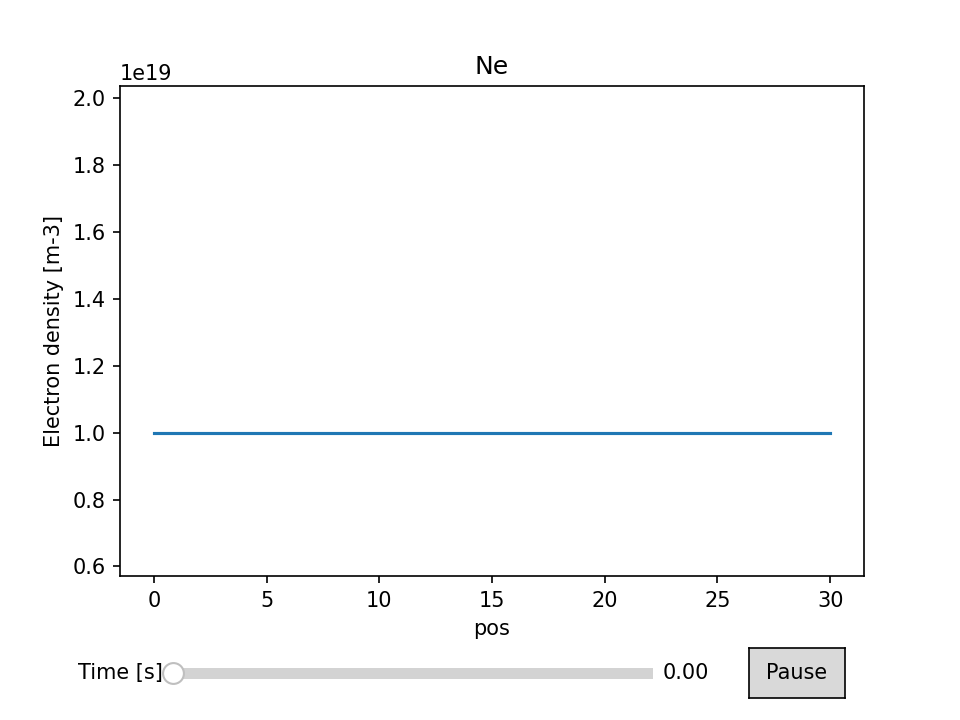

In [17]:
fig, ax = plt.subplots(dpi = 150)
xbout.plotting.animate.animate_line(ds["Ne"], ax = ax)

In [14]:
import matplotlib as mpl
from matplotlib.widgets import RangeSlider, TextBox, Slider
import animatplot as amp

plt.close("all")

dpi = 100
len = 30
wspace = 0.3
ds = cases["pioff"].ds.isel(pos=slice(1,-1))
# params = ["NVd+", "Sd+_iz", "Sd+_rec"]
# params = ["NVd+", "NVd+", "NVd+"]
params = ["Ne", "Ne", "Ne"]
# params = ["Sd+_"]
# auxparam = ds["ncalls"]
auxparam = ds["Ne"].isel(pos=0)
# auxparam = ((ds["Nd+"]+ds["Nd"]) * ds["dv"]).sum("pos")
t = ds.coords["t"].values
num_plots = len(params)

fig = plt.figure(dpi=dpi)
fig.set_figheight(4)
fig.set_figwidth(num_plots*6)
fig.subplots_adjust(bottom = 0.2)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_plots+1, nrows=1,
                                wspace = wspace,
                                width_ratios = [0.4, 0.2, 0.2, 0.2]
                                )

axes = [None] * num_plots
data = [None] * num_plots
blocks = [None] * num_plots

timeline = amp.Timeline(t, units = "s", fps = 10)


pos = ds["pos"].values

for i, param in enumerate(params):
    data[i] = ds[param].values

# Make scanning line
vline = np.repeat(np.array([[min(auxparam.values), max(auxparam.values)]]), len(t), axis = 0)

axes[0] = fig.add_subplot(gs0a[0])
blocks[0] = amp.blocks.Line(ds["pos"], ds[param].values, ax = axes[0], color = "black", marker = "o", markersize = 0)
axes[0].set_xlim(0,len)
axes[0].set_title("Entire domain")
# axes[0].set_yscale("symlog")
axes[0].set_ylim(1e17, 1e20)

zoomds = ds.sel(pos=slice(None,None)).copy()
axes[1] = fig.add_subplot(gs0a[1])
blocks[1] = amp.blocks.Line(zoomds["pos"], zoomds[param].values, ax = axes[1], color = "black", marker = "o", markersize = 0)
# axes[1].set_ylim(axes, 0.0001)
axes[1].set_title("Y zoom: Small waves in upstream")
axes[1].set_yscale("symlog")


zoomds = ds.sel(pos=slice(38,None)).copy()
axes[2] = fig.add_subplot(gs0a[2])
blocks[2] = amp.blocks.Line(zoomds["pos"], zoomds[param].values, ax = axes[2], color = "black", marker = "o", markersize = 2)
# axes[2].set_xlim(77.1, 77.4)
axes[2].set_title("X zoom: Momentum walk & front")
# axes[2].set_ylim(-0.003, 0.007)

for i in [0,1,2]:
    axes[i].grid(alpha = 0.3)

# Aux plot and vline
axes.append(fig.add_subplot(gs0a[len(params)]))
axes[-1].plot(t, auxparam, c = "darkslategrey")
axes[-1].grid()
axes[-1].set_title("Runtime spikes")

# Line is two points, these are the X coordinates for those two points for all times
x = np.tile(t,  (2,1)).transpose()
blocks.append(amp.blocks.Line(x, vline, ax = axes[-1], t_axis=0, color = "deeppink"))

# blocks[-1] = 
    
anim = amp.Animation(blocks, timeline)
anim.controls({"text":"TIME", "color":"darkorange", "valfmt":"%1.3e"})
aux_plot_idx = num_plots
    
# anim.save_gif("vis4walk.gif")




TypeError: 'int' object is not callable

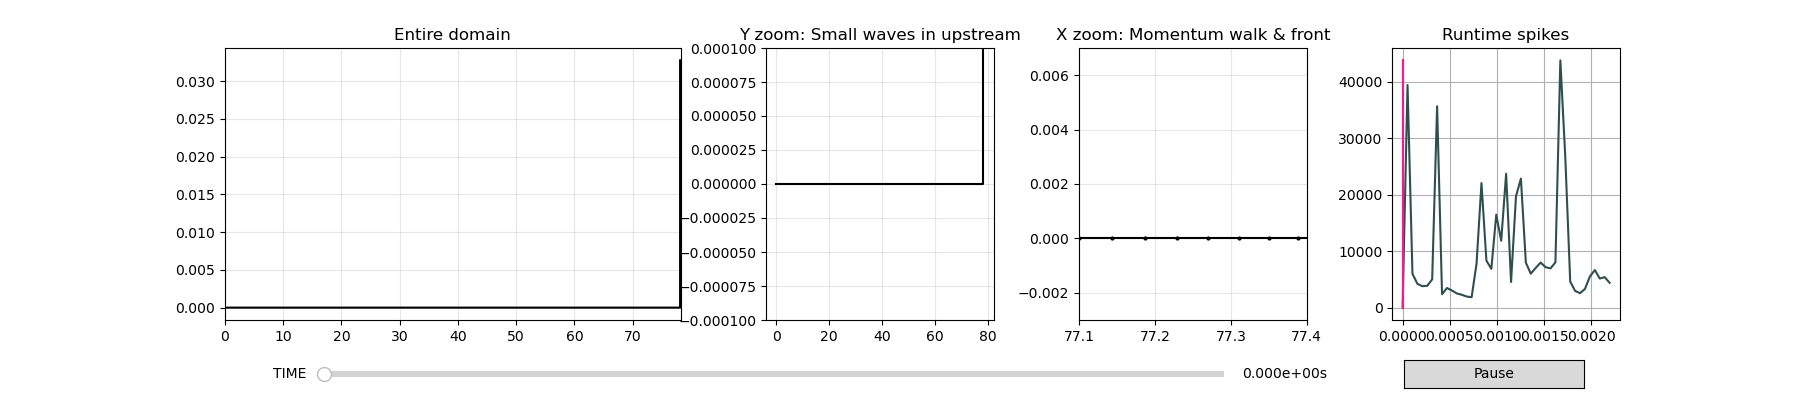

In [ ]:
from matplotlib.widgets import RangeSlider, TextBox, Slider
import animatplot as amp

plt.close("all")

dpi = 100

wspace = 0.3
ds = cases["step-1a"].ds.isel(pos=slice(1,-1))
# params = ["NVd+", "Sd+_iz", "Sd+_rec"]
params = ["NVd+", "NVd+", "NVd+"]
# params = ["Sd+_"]
auxparam = ds["ncalls"]
# auxparam = ((ds["Nd+"]+ds["Nd"]) * ds["dv"]).sum("pos")
t = ds.coords["t"].values
num_plots = len(params)

fig = plt.figure(dpi=dpi)
fig.set_figheight(4)
fig.set_figwidth(num_plots*6)
fig.subplots_adjust(bottom = 0.2)

# Plot grid
gs0a = mpl.gridspec.GridSpec(
                                ncols=num_plots+1, nrows=1,
                                wspace = wspace,
                                width_ratios = [0.4, 0.2, 0.2, 0.2]
                                )

axes = [None] * num_plots
data = [None] * num_plots
blocks = [None] * num_plots

timeline = amp.Timeline(t, units = "s", fps = 10)


pos = ds["pos"].values

for i, param in enumerate(params):
    data[i] = ds[param].values

# Make scanning line
vline = np.repeat(np.array([[min(auxparam.values), max(auxparam.values)]]), len(t), axis = 0)



axes[0] = fig.add_subplot(gs0a[0])
blocks[0] = amp.blocks.Line(ds["pos"], ds[param].values, ax = axes[0], color = "black", marker = "o", markersize = 0)
axes[0].set_xlim(0,78.2)
axes[0].set_title("Entire domain")
# axes[0].set_yscale("symlog")

zoomds = ds.sel(pos=slice(None,None)).copy()
axes[1] = fig.add_subplot(gs0a[1])
blocks[1] = amp.blocks.Line(zoomds["pos"], zoomds[param].values, ax = axes[1], color = "black", marker = "o", markersize = 0)
axes[1].set_ylim(-0.0001, 0.0001)
axes[1].set_title("Y zoom: Small waves in upstream")
# axes[1].set_yscale("symlog")


zoomds = ds.sel(pos=slice(76,None)).copy()
axes[2] = fig.add_subplot(gs0a[2])
blocks[2] = amp.blocks.Line(zoomds["pos"], zoomds[param].values, ax = axes[2], color = "black", marker = "o", markersize = 2)
axes[2].set_xlim(77.1, 77.4)
axes[2].set_title("X zoom: Momentum walk & front")
axes[2].set_ylim(-0.003, 0.007)

for i in [0,1,2]:
    axes[i].grid(alpha = 0.3)

# Aux plot and vline
axes.append(fig.add_subplot(gs0a[len(params)]))
axes[-1].plot(t, auxparam, c = "darkslategrey")
axes[-1].grid()
axes[-1].set_title("Runtime spikes")

# Line is two points, these are the X coordinates for those two points for all times
x = np.tile(t,  (2,1)).transpose()
blocks.append(amp.blocks.Line(x, vline, ax = axes[-1], t_axis=0, color = "deeppink"))

# blocks[-1] = 
    
anim = amp.Animation(blocks, timeline)
anim.controls({"text":"TIME", "color":"darkorange", "valfmt":"%1.3e"})
aux_plot_idx = num_plots
    
# anim.save_gif("vis4walk.gif")


